In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import math
import pandas as pd

matplotlib.rc('font', family='Arial')

In [2]:
class RedDroppingFunction:

    def __init__(self, b0, b, p0):
        self.b0 = b0
        self.b = b
        self.p0 = p0

    def get_drop_probability(self, x):
        if(x <= self.b0):
            return 0
        if(x >= self.b):
            return 1

        return (self.p0/(self.b-self.b0-1))*x - self.p0*self.b0/(self.b-self.b0-1)

xs=np.arange(0,25)
plt.plot(xs,[RedDroppingFunction(10,20,0.7).get_drop_probability(x) for x in xs],'ob')
plt.axis([0,25,-0.1,1.1])
plt.xlabel(u"długość kolejki")
plt.ylabel(u"prawdopodobieństwo")
plt.title("RED min_th=10, max_th=20, max_p=0.7")
plt.show()

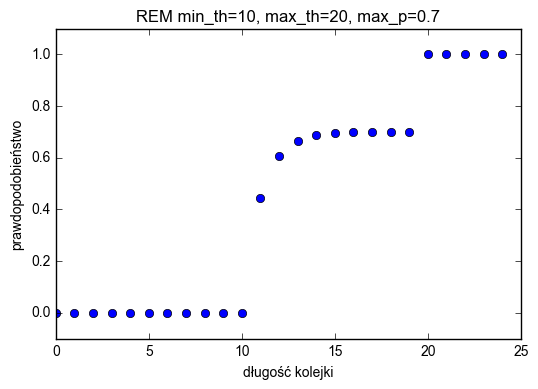

In [4]:
class RemDroppingFunction:

    def __init__(self, b0, b, p0):
        self.b0 = b0
        self.b = b
        self.p0 = p0

    def get_drop_probability(self, x):
        if(x <= self.b0):
            return 0
        if(x >= self.b):
            return 1

        return (self.p0/(np.exp(-self.b+1+self.b0)-1)) * np.exp(-x + self.b0) 
                                            - self.p0/(np.exp(-self.b+1+self.b0)-1)

xs=np.arange(0,25)
plt.plot(xs,[RemDroppingFunction(10,20,0.7).get_drop_probability(x) for x in xs],'ob')
plt.axis([0,25,-0.1,1.1])
plt.xlabel(u"długość kolejki")
plt.ylabel(u"prawdopodobieństwo")
plt.title("REM min_th=10, max_th=20, max_p=0.7")
plt.show()

In [4]:
class GredDroppingFunction:

    def __init__(self, a, b, c, p1, p2):
        self.a = a
        self.b = b
        self.c = c
        self.p1 = p1
        self.p2 = p2

    def get_drop_probability(self, x):
        if(x < self.a):
            return 0

        if((x >= self.a) & (x < self.b)):
            return ((0-self.p1)/(self.a-self.b))*x + 
                            (0-((0-self.p1)/(self.a-self.b))*self.a)

        if((x >= self.b) & (x < self.c)):
            return ((self.p1-self.p2)/(self.b-self.c))*x +
                            (self.p1-((self.p1-self.p2)/(self.b-self.c))*self.b)

        if(x >= self.c):
            return 1

xs=np.arange(0,35)
plt.plot(xs,[GredDroppingFunction(10,20,30,0.2,0.8).get_drop_probability(x) for x in xs],'ob')
plt.axis([0,35,-0.1,1.1])
plt.xlabel(u"długość kolejki")
plt.ylabel(u"prawdopodobieństwo odrzucenia")
plt.title("GRED a=10, b=20, c=30, p1=0.2, p2=0.8")
plt.show()